# Tutorial Sessions Presentation

This notebook presents examples of the machine learning methods we have covered in Computational Astrobiology. Below is an overview of the topics discussed in this presentation:

1. Logistic Regression
2. Naive Bayes
3. Support vector machines
4. Decision Trees
5. Random Forests
6. Principal Component Analysis (Only unsupervised example)
7. K nearest neighbours using K-fold Cross Validation
8. Feed forward Neural Networks
9. Transformers

# Tutorial 1 - Logistic Regression

Logistic regression is a method that is used for binary classification tasks. It predicts whether a feature belongs to one of two categories. For example: spam or not spam, disease or no disease, pass or fail.

In the following example, logistic regression is used to predict whether a student will pass or fail in an exam when considering the number of hours they have studied prior.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data: hours studied vs pass(1)/fail(0)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)
preds = model.predict(X_test)

print("Predicted probabilities:\n", probs)
print("Predicted labels:\n", preds)

Predicted probabilities:
 [[0.01799318 0.98200682]
 [0.98200654 0.01799346]]
Predicted labels:
 [1 0]


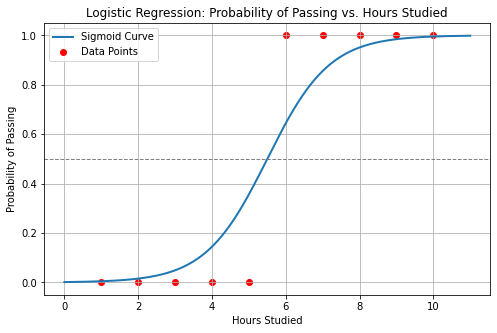

   Hours Studied  Predicted Probability of Passing Predicted Outcome
0            3.0                              0.05              Fail
1            5.5                              0.50              Pass
2            7.0                              0.86              Pass
3            9.0                              0.98              Pass


In [2]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate values for plotting sigmoid curve
X_plot = np.linspace(0, 11, 300).reshape(-1, 1)
probs = model.predict_proba(X_plot)[:, 1]

# Plotting the sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(X_plot, probs, label='Sigmoid Curve', linewidth=2)
plt.scatter(X, y, color='red', label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability of Passing vs. Hours Studied')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

# Sample predictions
sample_hours = np.array([[3], [5.5], [7], [9]])
sample_probs = model.predict_proba(sample_hours)
sample_preds = model.predict(sample_hours)

# Display results
results = []
for i in range(len(sample_hours)):
    results.append({
        "Hours Studied": sample_hours[i][0],
        "Predicted Probability of Passing": round(sample_probs[i][1], 2),
        "Predicted Outcome": "Pass" if sample_preds[i] == 1 else "Fail"
    })

results_df = pd.DataFrame(results)
print(results_df)

**Advantages:**

- Simple and easy to implement.

- Interpretable results.

- Performs well on linearly separable data.

**Limitations:**

- Not ideal for highly complex or non-linear data without transformations or extensions.

- Can only deal with binary cases.

# Tutorial 2 - Naive-Bayes

Naive Bayes is a probabilistic classification algorithm based on Bayes' statistics. It used the following formula to predict the probability of a class given its input.

𝑃( 𝐿 | features ) = 𝑃( features | 𝐿 ) / 𝑃(𝐿) 𝑃(features)

The model makes a 'naive' assumption that all features are independent of eachother - which practically is not usually the case. This method predicts the probabilites of an object landing in all classes, and returns the most probable class for a given data point.

Some areas where Naive-Bayes method is used:

- Text classification (e.g. spam detection)
- Medical diagnosis
- Document categorization
- Recommendation systems

There are three sub sections of Naive-Bayes:

- Gaussian Naive Bayes: Assumes features follow a normal distribution (for continuous data).

- Multinomial Naive Bayes: When features are counts or count-rates. Commonly used in text classification (eg for word counts).

- Bernoulli Naive Bayes: For binary features (e.g., word present or not).

## Guassian Naive-Bayes

In [3]:
import seaborn as sns
%matplotlib inline

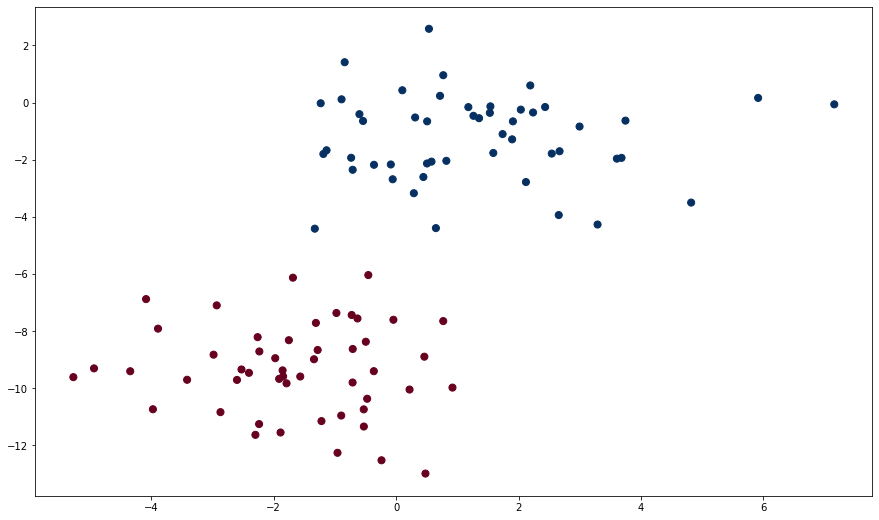

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.figure(figsize=(15,9))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

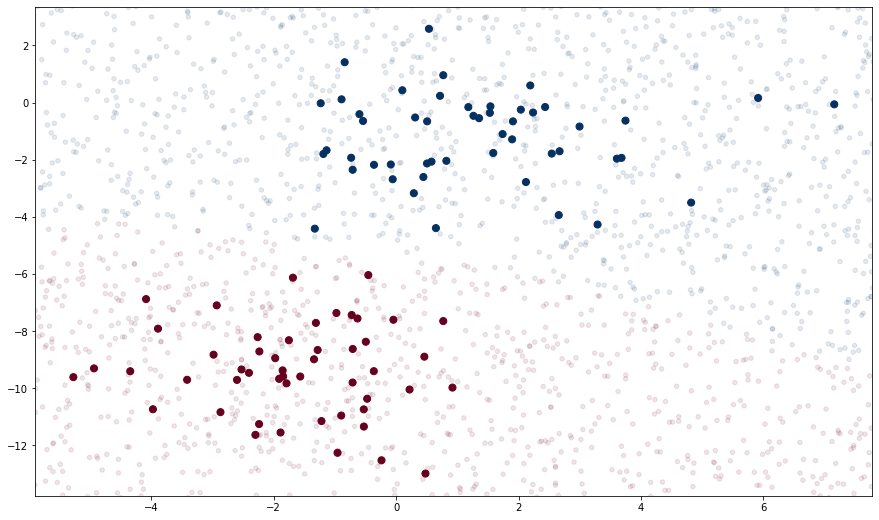

In [6]:
plt.figure(figsize=(15,9))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);
# Shows the boundary created by Naive Bayes.

In [7]:
# Probabilistic Classification:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)
# This shows the posterior probabilities of the first and second labels, respectively.

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multi-nomial Naive-Bayes
## Use when features are counts or count-rates

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
#To convert strings into a vector of numbers
from sklearn.naive_bayes import MultinomialNB
#To convert the vector of numbers to a multinomial NB classifier
from sklearn.pipeline import make_pipeline


model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

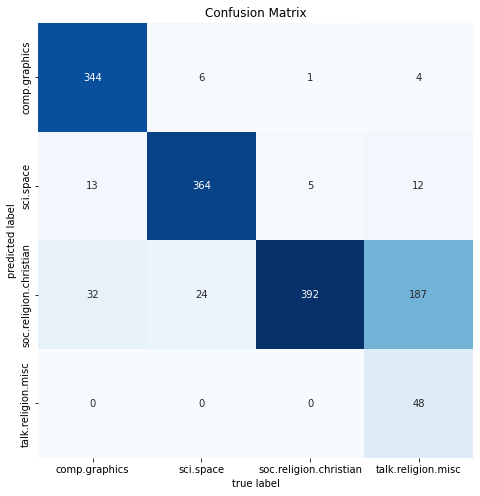

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [12]:
predict_category('sending a payload to the ISS')

'sci.space'

In [13]:
predict_category('determining the screen resolution')

'comp.graphics'

In [14]:
predict_category("BREAKING NEWS: Man falls from the heavens! The astronaut fell 3km for the Red Bull challenge.")

'sci.space'

In [15]:
predict_category("BREAKING NEWS: Man falls from the heavens! After an exostential conversation with God Himself, the astronaut fell 3km for the Red Bull challenge.")

'soc.religion.christian'

**Advantages:**

- Very fast and efficient even on large datasets - Often used as a rough, baseline model to help make informed decision when implementing a more complex model

- Performs well with text data.

**Limitations:**

- Assumes independence between features — often not true in real-world data.

- Often has low accuracy compared to more complex models, especially if features are highly correlated.

In [16]:
# Tutorial 3 - Exoplanet exploration can be shown in seperate notebook

# Tutorial 3 - Support Vector Machines

Support Vector Machines are mostly used for classification, but can be used sometimes for regression. The method tries to find the most optimal hyperplane (decision boundary) that separates classes in the feature space. 

In the following example that has only two dimentions, the hyperplane (line) is found that maximises the margin - the distance to the closest points (support vectors) from the hyperline. 

The method defines this margin as hard or soft, either of which can be better to use than the other based on the specific scenario (whether the data is noisy).

SVM work very well with linearly seperable data, but can also sometimes work with non-linearly seperable data using the **kernal trick**.

Common use cases:

- Text categorization
- Image classification
- Bioinformatics (e.g., classifying proteins or genes)
- Face detection

In [17]:
from scipy import stats

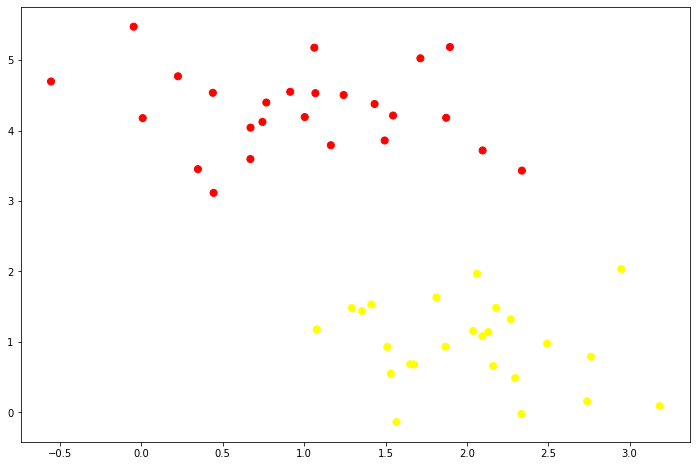

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

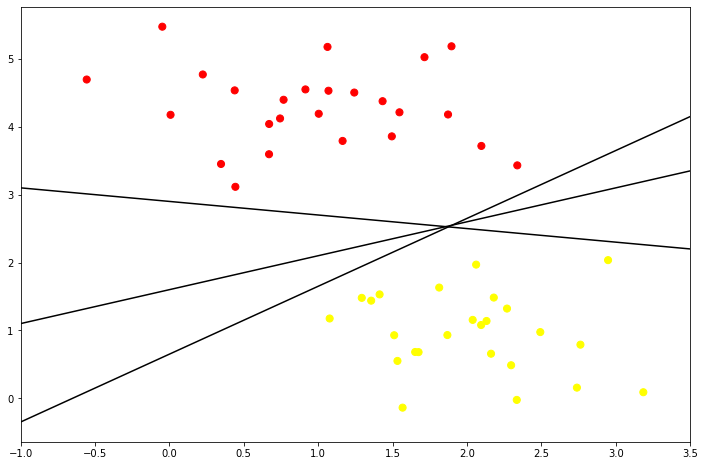

In [19]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

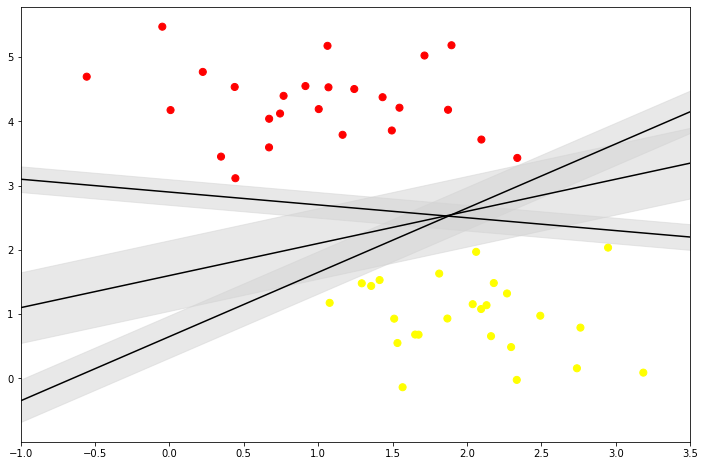

In [20]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5); # Aim is to maximize the margin! The bigger the margin the better the fit for unseen data.

In [21]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [22]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

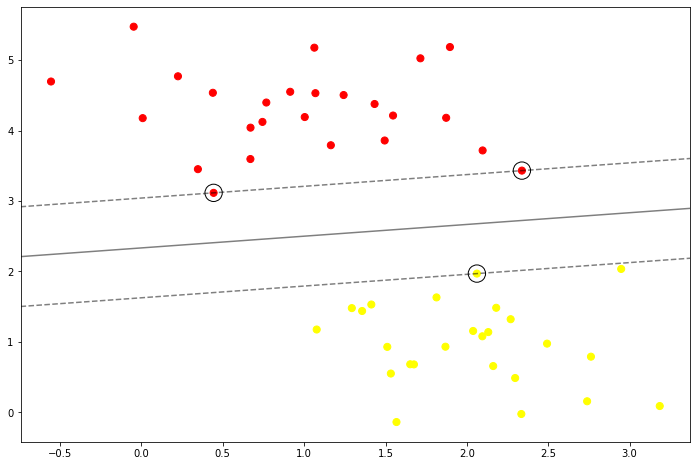

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [24]:
#sci kit learn has this function to indentify the support vectors:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Implementing Kernel Trick for non linear cases in higher dimentions:

Types of Kernels:
- Polynomial
- Sigmoid
- RBF
- Bessel Function
- Anova

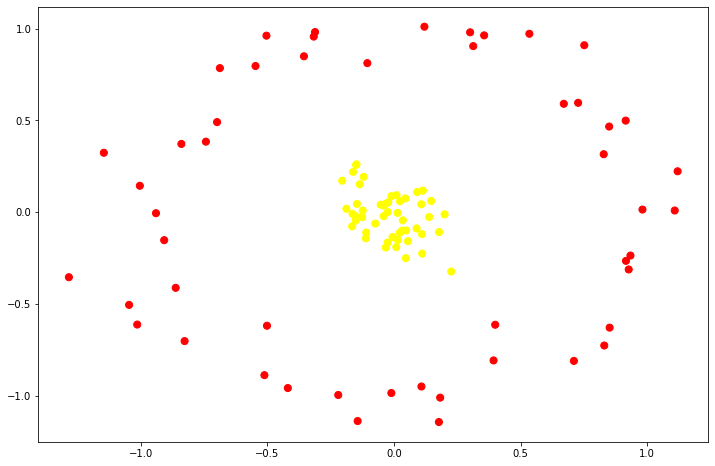

In [25]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

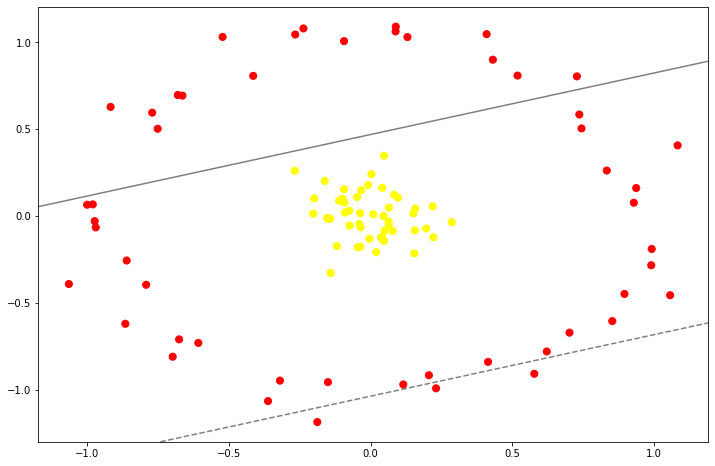

In [26]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False); # DOES NOT WORK

In [27]:
# Plot to show that that the data is in fact seperable when introducing another dimension:

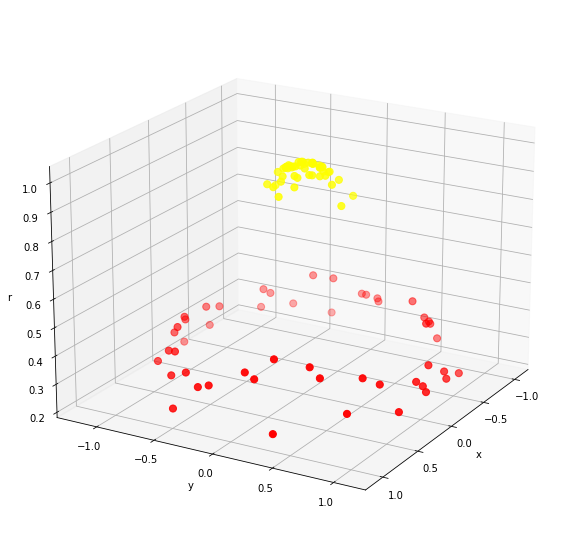

In [28]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');

In [29]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

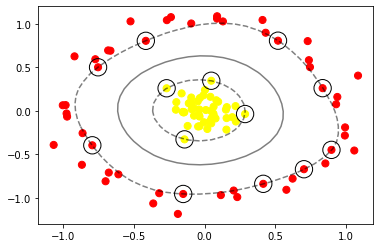

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# Hard vs Soft Margins

## Scenarios where hard margin is not best/ will not work:

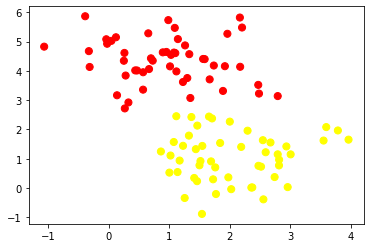

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

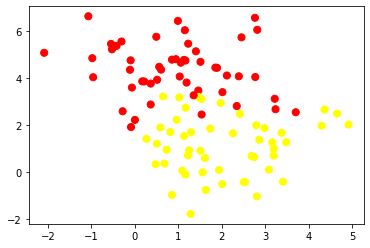

In [32]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

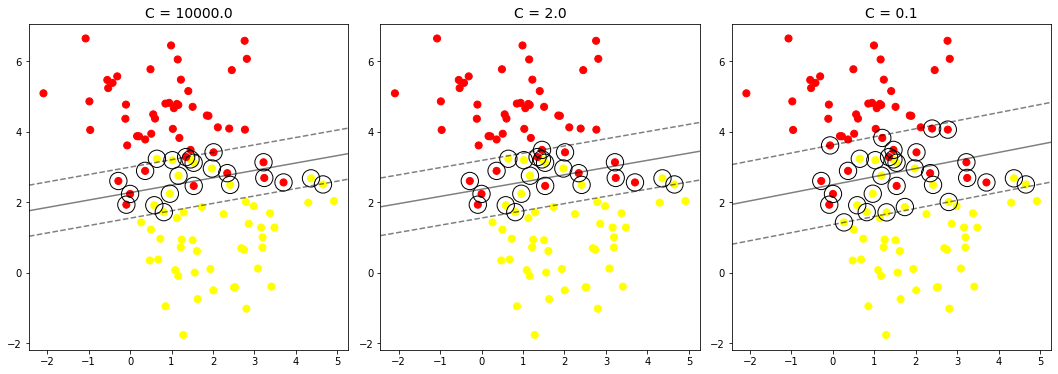

In [33]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10000.0, 2.0,0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Advantages:**

- Effective in high-dimensional spaces (great for text or gene data).

- Robust to overfitting, especially in cases where the number of dimensions is greater number of samples.

- Works well even with small datasets.

**Limitations:**

- Computationally intensive on large datasets.

- Hard to tune - choosing the right kernel and hyperparameters can be tricky.

- Doesn’t perform as well on noisy or overlapping data.

# Tutorial 4 - Decision Trees

A Decision Tree is also used for both classification and regression. 

It works by learning rules from data and making decisions by splitting data into smaller and smaller branches. It keeps on doing this until the data is completely seperated into its **leaf nodes**. 

Each split considers entropy to what it should ask at each branch. The split that is chosen, gains most information possible, which is the split that gains least entropy. H = 0 is a pure dataset, meaning all samples in a node belong to the same class.

Common use cases:
- Credit scoring

- Medical diagnosis

- Customer segmentation

- Churn prediction

In [34]:
# Exoplanet_Habitability tutorial too long for this presentation.
# Different example:

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

Test set accuracy: 1.00


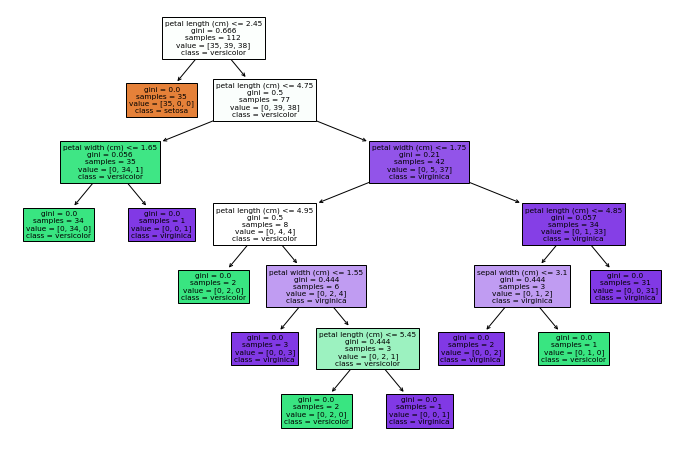

In [36]:
# Split dataset into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train the decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = clf.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

**Advantages:**
- Easy to understand and follow the process.

- No need for feature scaling.

- Works with both numerical and categorical data.

- Can handle non-linear relationships.

**Limitations:**
- Prone to overfitting (especially with deep trees). --> Random forest

- Unstable – small changes in data can lead to different trees.

- Less accurate than some other methods on complex problems.

# Tutorial 5 - Random Forests

Random Forest is an ensemble learning method that builds a “forest” of decision trees and combines their outputs to make better predictions. This reduces the risk of overfitting in deep decision trees, and works against the instability that arises with small changes in data. 

Many decision trees are implemented which each result in an individual classification. The class with the majority vote from the individual trees wins. In the case of regression, a weighted average of predictions can be calculated from all trees.

Commonly used for:

- Fraud detection
- Credit scoring
- Customer churn prediction
- Medical diagnosis
- Feature importance ranking

In [37]:
import sys
sys.path.append('../scripts/')

import numpy as np
import matplotlib.pyplot as plt

# scikit-learn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor

# output 
data = np.genfromtxt('SDSS-centrals-rf-data.txt')

In [38]:
sf = np.where(data[:,1] == 0)[0]
data = data[sf, :]

In [39]:
target = data[:,0] + data[:,-1]
features = data[:,2:]

In [40]:
scaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0),
                                    with_scaling=True,
                                    copy=True)                                                          
scaled_features = scaler.fit_transform(features)

In [41]:
features_tr, features_va, target_tr, target_va = train_test_split(scaled_features,
                                                                  target,
                                                                  test_size=0.5)    

In [42]:
reg = RandomForestRegressor(n_estimators=200,       
                             min_samples_leaf=120,     
                             n_jobs=-1)   

In [43]:
reg.fit(features_tr, target_tr)  

RandomForestRegressor(min_samples_leaf=120, n_estimators=200, n_jobs=-1)

In [44]:
pred_tr = reg.predict(features_tr)    # an array of sSFR predictions for each object in the 
                                      # training sample 

pred_va = reg.predict(features_va)

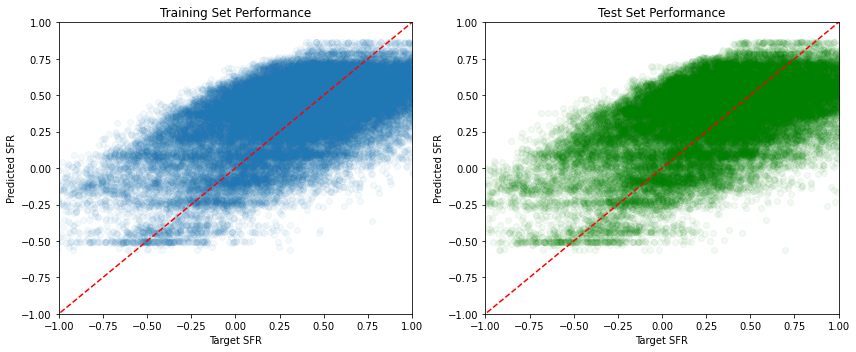

In [45]:
# Plotting predicted vs true SFR for both training and validation sets
plt.figure(figsize=(12, 5))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(target_tr, pred_tr, alpha=0.05)
plt.plot([target_tr.min(), target_tr.max()], [target_tr.min(), target_tr.max()], 'r--')
plt.xlabel("Target SFR")
plt.ylabel("Predicted SFR")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Training Set Performance")

# Validation Set
plt.subplot(1, 2, 2)
plt.scatter(target_va, pred_va, alpha=0.05,color='g')
plt.plot([target_va.min(), target_va.max()], [target_va.min(), target_va.max()], 'r--')
plt.xlabel("Target SFR")
plt.ylabel("Predicted SFR")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Test Set Performance")

plt.tight_layout()
plt.show()

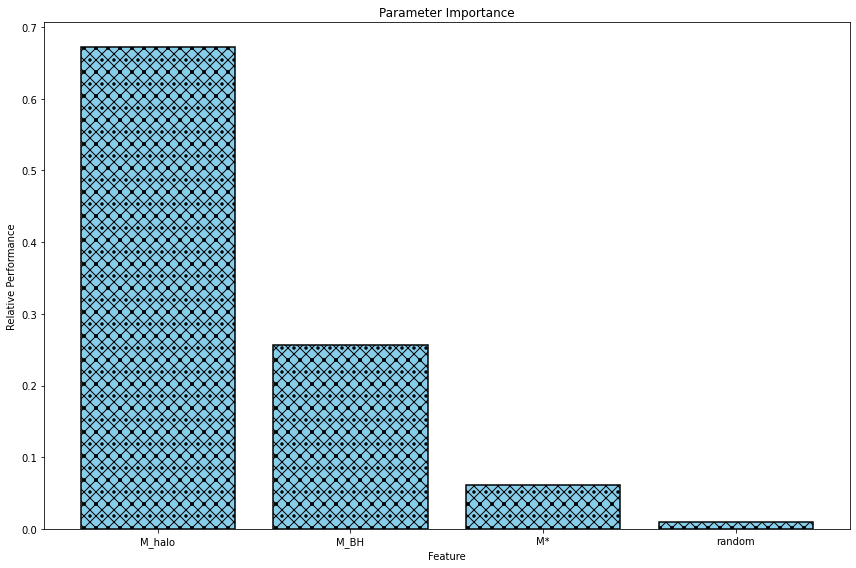

In [46]:
importances = reg.feature_importances_
num_features = features.shape[1]
feature_names = ['random','M*','M_halo','M_BH']

# Sort the importances and corresponding feature names
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(range(num_features), sorted_importances, tick_label=sorted_feature_names,color='skyblue',edgecolor='black', linewidth=1.5)
for bar in bars:
    bar.set_hatch('xx.')
#plt.bar(range(num_features), sorted_importances, tick_label=sorted_feature_names)
#plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Relative Performance")
plt.title("Parameter Importance")
plt.tight_layout()
plt.show()

**Advantages:**
- Can acheive much higher accuracy.

- Robust to overfitting.

- Can handle missing data and imbalanced datasets well.

- Works with both numerical and categorical features.

- Gives feature importance scores which is good for interpretability

**Limitations:**
- Slower and more complex than a single tree.

- Less interpretable than a simple decision tree.

- Can be memory-intensive with lots of trees or very large datasets.

# Tutorial 6 - Principal Component Analysis

PCA is an **unsupervised** learning technique used for dimensionality reduction. It transforms a large set of possibly correlated variables into a smaller set of uncorrelated variables called principal components, while preserving as much information (or the most important information) as possible.

PC1  is defined to capture the most variance. PC2 captures the most remaining variance (and is orthogonal to PC1), and so on for as many dimensions as you reduce. Each principal component must be perpendicular to the others so that they are uncorrelated. 

After the principal components have been defined, the user must center the data by subtracting the mean, compute the covariance matrix, and find the eigenvectors and eigenvalues from this. This allows the data to be projected onto the top k eigenvectors (principal components).

Used for:
- Data visualization (e.g., reducing to 2D or 3D for plotting)

- Preprocessing for other ML models

- Noise reduction

- Face recognition

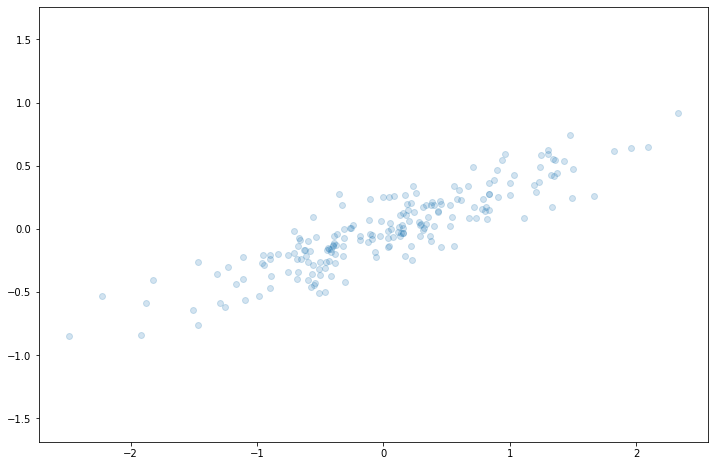

In [47]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],alpha=0.2)
plt.axis('equal');

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [49]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


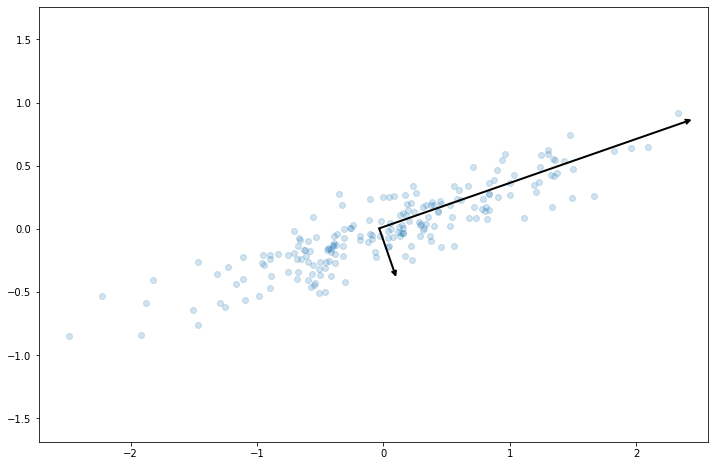

In [50]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0,color='black')
    ax.annotate('', -v1, -v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [51]:
# Dimension Reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


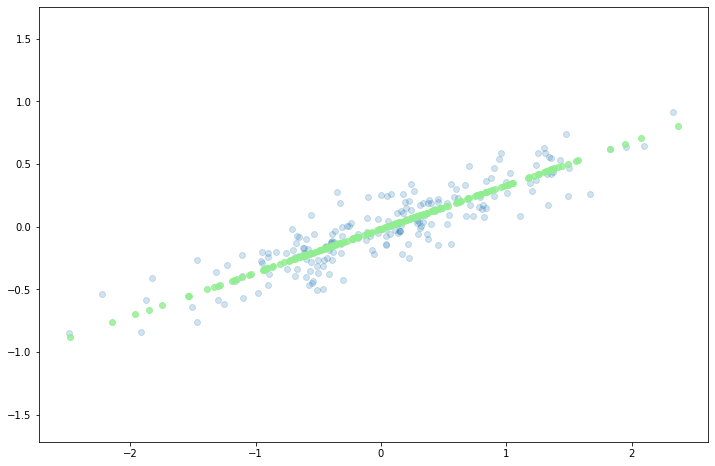

In [52]:
plt.figure(figsize=(12,8))
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8,color='#90EE90')
plt.axis('equal');

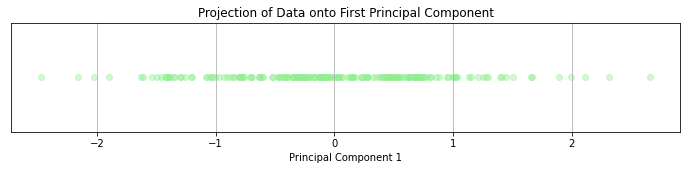

In [53]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plot the 1D projection
plt.figure(figsize=(12, 2))
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.4,color='#90EE90')
plt.title("Projection of Data onto First Principal Component")
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.grid(True)
plt.show()

**Advantages:**
- Reduces complexity while retaining the key information.

- Speeds up training for other models.

- Useful for visualizing high-dimensional data.

**Limitations:**
- Can be hard to interpret the new components as they are combinations of original features.

- Doesn’t work well with non-linear data structures (similar to SVM, Kernel PCA can be used in rare cases).

- Sensitive to scaling — features should be normalized which is not always possible (feature engineering).

# Tutorial 7 - K nearest neighbours using K-fold Cross Validation

KNN is a simple and intuitive method, again used for both classification and regression. It works by comparing a new data point to its “K” nearest data points in the training set and making predictions based on them. It uses 'lazy learning' as it does not build a model, but memorises the training data.

When a new data point is compared to the training data, it computes the distance from the new point to all training points (usually Euclidean distance but can use others like manhattan, minkowski, chebyslev, hamming etc). By ordering this distances in ascending order, it finds the 'K' closest data points (the "neighbors"). Then these points vote towards the classification of the new point. Again in the case of regression an average of their values is computed for the new point.

Commonly used for:

- Image classification

- Text classification (e.g., spam detection)

- Medical diagnosis

- Anomaly detection

In [54]:
import os
from sklearn.datasets import load_iris
iris=load_iris()

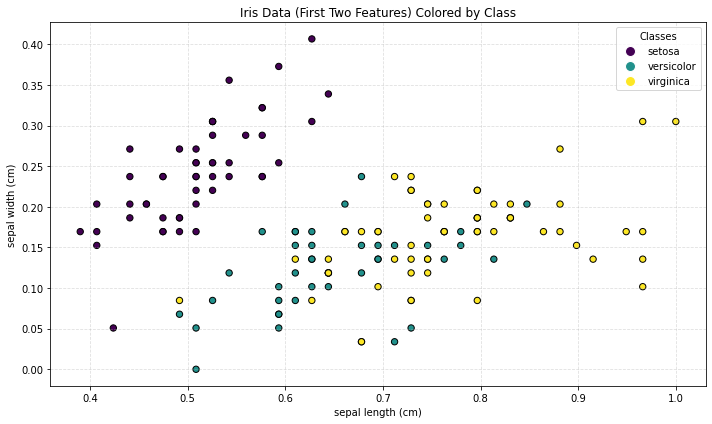

In [55]:
X = iris.data[:, :2]
y = iris.target

# Standardize features
X = (X - np.min(X)) / (np.max(X) - np.min(X))

# Plot data points only (no decision boundaries)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Data (First Two Features) Colored by Class")

# Get unique classes and map colors from the scatter object
unique_classes = np.unique(y)
colors = scatter.cmap(scatter.norm(unique_classes))

# Create legend handles that match the scatter plot's colors
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=color, label=iris.target_names[i],
               markersize=10)
    for i, color in zip(unique_classes, colors)
]

plt.legend(handles=legend_handles, title="Classes")
plt.grid(True,linestyle='--',alpha=0.4)

plt.tight_layout()
plt.show()

In [56]:
X=iris.data
y=iris.target
X=(X-np.min(X))/(np.max(X)-np.min(X)) 
#(standardization of data, check how data look after, used for easier calculation )

In [57]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [58]:
from sklearn.neighbors  import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [59]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=10)

In [60]:
print(accuracies)
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))


[1.         0.90909091 0.90909091 1.         0.90909091 0.9
 1.         0.9        1.         1.        ]
average accuracy : 0.9527272727272728
average std : 0.04737750625743776


In [61]:
from sklearn.model_selection import GridSearchCV

grid ={"n_neighbors":np.arange(1,50)}
knn= KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=10) #GridSearchCV
knn_cv.fit(X,y)
print("tuned hyperparameter K:",knn_cv.best_params_)

tuned hyperparameter K: {'n_neighbors': 13}


# Implement K-fold cross validation

Model evaluation technique that helps prevent overfitting, especially for small datasets.

It works by splitting the available training and test data into 'k' folds. These folds are recontructed in random and different orders, then the model is evaluated for each sequence of data. The average accuracy can be calculated from all these different runs.

This method is effective to improve accuracy when there is limited data. Conversely it is computationally expensive when used on large datasets.

In [62]:
from sklearn.model_selection import KFold
scores=[]
kFold=KFold(n_splits=13,shuffle=False)
for train_index,test_index in kFold.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
knn.fit(X_train,y_train)
scores.append(knn.score(X_test,y_test))

Train Index:  [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 1

In [63]:
cross_val_score(knn, X, y, cv=13)

array([1.        , 0.91666667, 1.        , 1.        , 1.        ,
       0.83333333, 0.91666667, 1.        , 0.90909091, 1.        ,
       1.        , 1.        , 1.        ])

In [64]:
print(np.mean(scores))

0.9632034632034631


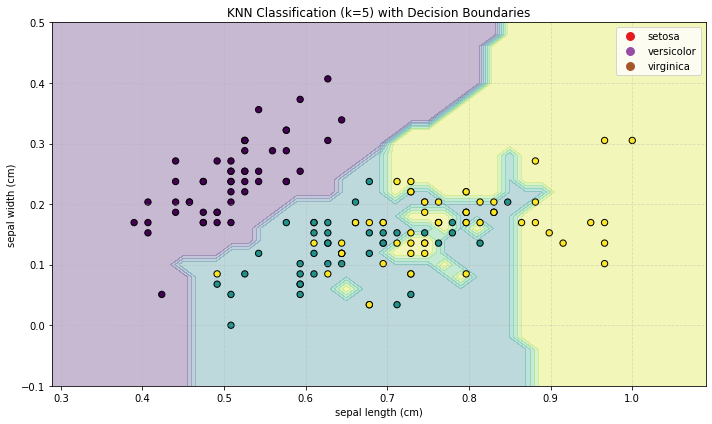

In [65]:
# Load Iris dataset and use only the first two features for 2D plotting
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Standardize features
X = (X - np.min(X)) / (np.max(X) - np.min(X))

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

# Create a mesh grid for plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Classification (k=5) with Decision Boundaries")

# Create custom legend
legend_labels = iris.target_names
legend_handles = [plt.Line2D([0], [0], marker='o', color='w',
                             label=label, markerfacecolor=plt.cm.Set1(i / 3), markersize=10)
                  for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles)
plt.grid(True,linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

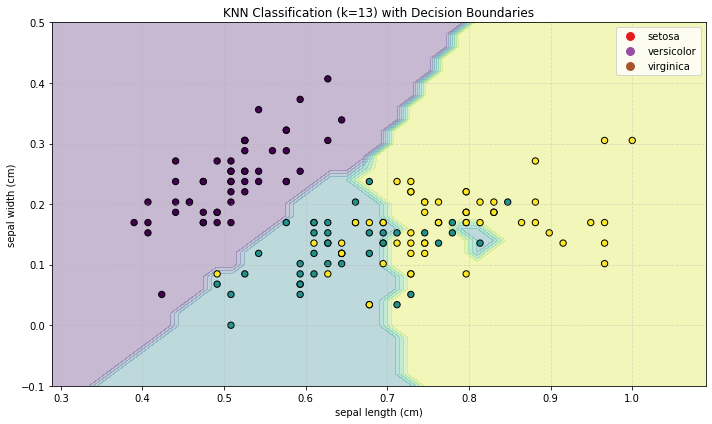

In [66]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X, y)

# Create a mesh grid for plotting decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Classification (k=13) with Decision Boundaries")

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w',
                             label=label, markerfacecolor=plt.cm.Set1(i / 3), markersize=10)
                  for i, label in enumerate(iris.target_names)]
plt.legend(handles=legend_handles)
plt.grid(True,linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

**Advantages:**
- Simple and easy to understand

- No training required (good for small datasets)

- Can adapt to complex decision boundaries

- Naturally handles multiclass classification

**Limitations:**

- Memory-intensive, since it stores all training data

- Sensitive to irrelevant or scaled features (requires heavy feature engineering in practical cases)

- CURSE OF DIMENSIONALILTY - It is slow difficult to calculate distance to each point when there many dimensions.


# Tutorial 8 - Feed Forward Neural Network from scratch

This is the simplest type of artificial neural network, where information moves only forward, from input to output, with no loops or cycles. More complex NN's use loops - meaning not only the layer previouis effects the next layer - which yeilds much better results.

The structure of this neural network is layered: the input layer receives the raw data, the hidden layer(s) which process inputs via weights and activation functions, and the output layer, which produces the final prediction or classification.

Choices of activation functions:

- Sigmoid

- ReLU

- tanh

- Softmax


Use cases:

- Image recognition

- Spam detection

- Stock price prediction

- Medical diagnosis

In [67]:
# Data and Stats packages
import numpy as np
import pandas as pd
#import statsmodels.api as sm
#from statsmodels.api import OLS
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score

# Visualization packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

# Aesthetic settings
from IPython.display import display
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 500)
sns.set_style('whitegrid')
sns.set_context('talk')

In [68]:
#Import dataframe
fun_df = pd.read_csv('fun_dataset.csv')
fun_df = fun_df[['x', 'y']]
display(fun_df.head())
print(fun_df.shape)

,x,y
0,2.617188,-2.265495
1,0.000000,0.000000
2,9.375000,-9.363387
3,8.320312,-3.740912
4,0.195312,0.191599


(100, 2)


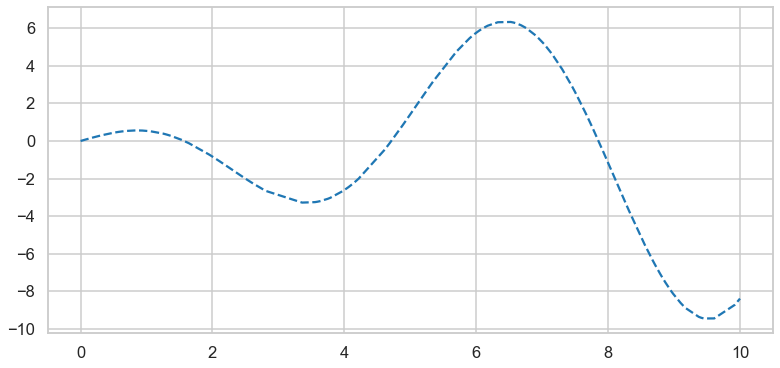

In [69]:
fun_df = fun_df.sort_values(by = 'x')
plt.plot(fun_df.x, fun_df.y, '--')

In [70]:
# Defining X and Y
X = fun_df.x
Y = fun_df.y
# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=9001)

# Re-shaping data
x_train, y_train = x_train.values.reshape(-1,1), y_train.values
x_test, y_test = x_test.values.reshape(-1,1), y_test.values
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 1) (25, 1) (75,) (25,)


In [71]:
means = {'x': x_train.mean(), 'y': y_train.mean()}
stds = {'x': x_train.std(), 'y': y_train.std()}

x_train = (x_train - means['x'])/stds['x']
y_train = (y_train - means['y'])/stds['y']

x_test = (x_test - means['x'])/stds['x']
y_test = (y_test - means['y'])/stds['y']

In [72]:
input_dim = 1
output_dim = 1

num_hidden_layers = 1
num_hidden_nodes = 3

In [73]:
print("WL0: ({0},{1})".format(num_hidden_nodes, input_dim+1))
print("WL1: ({0},{1})".format(output_dim, num_hidden_nodes+1))

WL0: (3,2)
WL1: (1,4)


In [74]:
sigmoid = lambda x: (1/(1 + np.exp(-x)))

In [75]:
# ASSIGNING WEIGHTS

# all 1s
WL0 = np.ones((num_hidden_nodes, input_dim+1))
WL1 = np.ones((output_dim, num_hidden_nodes+1))                


# FORWARD PROPAGATION

# input layer
ones = np.ones((len(x_train),1))    
L0 = x_train 
L0 = np.append(L0, ones, axis=1)

# hidden layer
a0 = np.dot(WL0, L0.T)
z0 = {'sigmoid': sigmoid(a0)}

# output layer 
ones = np.ones((len(y_train),1))
z0['sigmoid'] = np.append(z0['sigmoid'].T, ones,axis=1).T

# affine 
a1 = {'sigmoid': np.dot(WL1, z0['sigmoid'])}
z1 = a1

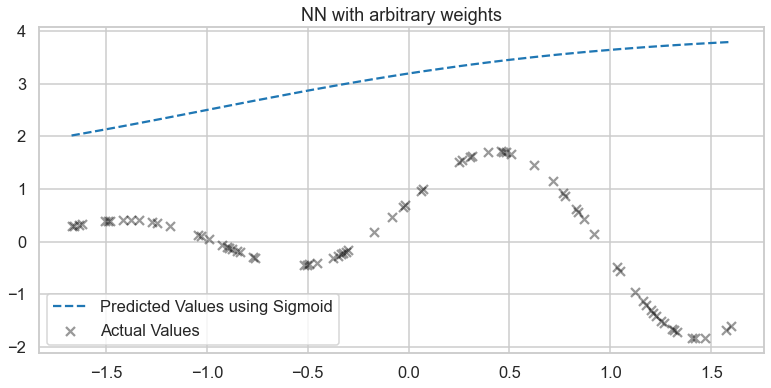

In [76]:
# PLOTTING THE MODEL
def plot_nn_models(result_df, title, sig):
    result_df = result_df.sort_values(by = 'x_train')
    plt.scatter(result_df.x_train, result_df.y_train, color='k', marker='x', label='Actual Values',alpha=0.4)
    if sig:
        plt.plot(result_df.x_train, result_df.y_pred_train_sigmoid, '--', label='Predicted Values using Sigmoid')
    plt.title(title)
    plt.legend()
    return

result_df = pd.DataFrame({'x_train': x_train[:,0], 
                          'y_train': y_train, 
                          'y_pred_train_sigmoid': z1['sigmoid'][0]
                         })
plot_nn_models(result_df, 'NN with arbitrary weights', True)

In [77]:
loss = sum((result_df.y_pred_train_sigmoid - result_df.y_train)**2)
print(loss)

834.4958685683644


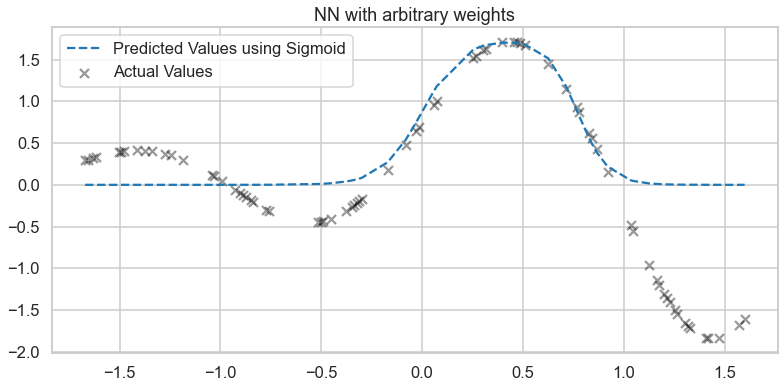

In [78]:
# ASSIGNING WEIGHTS

# Obtained using trial and error
WL0 = {'sigmoid': np.array([[10,0.01], [13,-10], [0.1,20]])}
WL1 = {'sigmoid': np.array([[1.75, -1.75, 1, -1]])}


# FORWARD PROPAGATION

# input layer
ones = np.ones((len(x_train),1))    
L0 = x_train 
L0 = np.append(L0, ones, axis=1)

# hidden layer
a0 = {'sigmoid': np.dot(WL0['sigmoid'], L0.T)}
z0 = {'sigmoid': sigmoid(a0['sigmoid'])}

# output layer 
ones = np.ones((len(y_train),1))
z0['sigmoid'] = np.append(z0['sigmoid'].T, ones,axis=1).T

# affine 
a1 = {'sigmoid': np.dot(WL1['sigmoid'], z0['sigmoid'])}
z1 = a1


# PLOTTING THE MODEL
result_df = pd.DataFrame({'x_train': x_train[:,0], 
                          'y_train': y_train, 
                          'y_pred_train_sigmoid': z1['sigmoid'][0]
                         })
plot_nn_models(result_df, 'NN with arbitrary weights', True)

In [79]:
loss = sum((result_df.y_pred_train_sigmoid - result_df.y_train)**2)
print(loss)

42.239709678893654


In [80]:
# Re-defining the number of hidden nodes
num_hidden_nodes = 4

# Printing shape of weight vectors
print("WL0: ({0},{1})".format(num_hidden_nodes, input_dim+1))
print("WL1: ({0},{1})".format(output_dim, num_hidden_nodes+1))

WL0: (4,2)
WL1: (1,5)


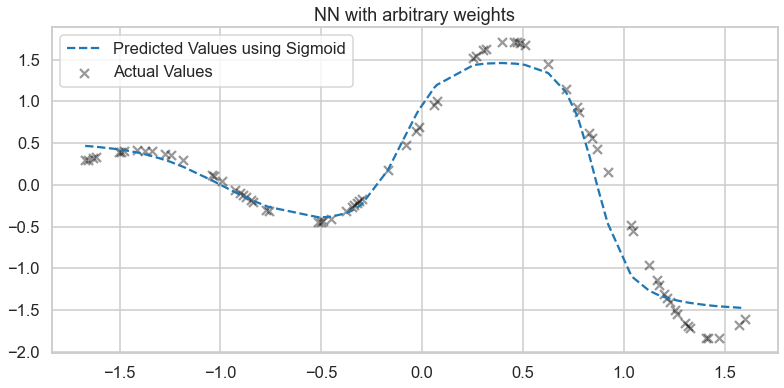

In [81]:
# ASSIGNING WEIGHTS

# Obtained using trial and error
WL0 = {'sigmoid': np.array([[10,1], [-5,-5], [14,-12], [-5,5]])}
WL1 = {'sigmoid': np.array([[2, 1, -2.5, 0.5, -1]])}


# FORWARD PROPAGATION

# input layer
ones = np.ones((len(x_train),1))    
L0 = x_train 
L0 = np.append(L0, ones, axis=1)

# hidden layer
a0 = {'sigmoid': np.dot(WL0['sigmoid'], L0.T)}
z0 = {'sigmoid': sigmoid(a0['sigmoid'])}

# output layer 
ones = np.ones((len(y_train),1))
z0['sigmoid'] = np.append(z0['sigmoid'].T, ones,axis=1).T

# affine 
a1 = {'sigmoid': np.dot(WL1['sigmoid'], z0['sigmoid'])}
z1 = a1


# PLOTTING THE MODEL
result_df = pd.DataFrame({'x_train': x_train[:,0], 
                          'y_train': y_train, 
                          'y_pred_train_sigmoid': z1['sigmoid'][0]
                         })
plot_nn_models(result_df, 'NN with arbitrary weights', True)

In [82]:
loss = sum((result_df.y_pred_train_sigmoid - result_df.y_train)**2)
print(loss)

3.1036981969199355


**Advantages:**
- Flexible: Can model nonlinear relationships.

- Powerful: With enough neurons/layers, can approximate any function (Universal Approximation Theorem).

- Applicable to both classification and regression.

**Limitations:**
- Requires lots of data to perform well.

- Training can be slow, especially with many layers or large datasets.

- Difficult to interpret unlike decision trees or logistic regression.

# Tutorial 9 - Transformers

A transformer is a deep learning architecture that relies entirely on a mechanism called self-attention to understand relationships between elements in a sequence. 

A single head attention block is comprised of three linear transformations:

Query (Q), Key (K) and Value (V) 

These projections are used to compute attention scores and generate weighted representations of the input.


The archiecture of a transformer includes encoder and decoder stacks which containing:

- Multi-head self-attention (attention is all you need)

- Feedforward network / Multi-layer perceptron

- Layer normalisations


Used for:

- Machine translation

- Text summarization, chatbots

- Computer Vision 

- Speech recognition

In [83]:
import pandas as pd
import torch
import torch.nn as nn
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output


class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x


class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x


class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList(
            [EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList(
            [DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(2)
        seq_length = tgt.size(-1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, 1, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))
        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output


In [84]:
df = pd.read_csv('a_catalog.csv')
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)

df.drop('name_s', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('nuniverse', axis=1, inplace=True)

scaler_number = 20000
scaler = MinMaxScaler(feature_range=(0, scaler_number))
columns_to_scale = [col for col in df.columns if col != 'stype']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

data = pd.get_dummies(df, columns=['stype']).astype(int)
data.reset_index(drop=True, inplace=True)

min_max_df = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max()
}).transpose()

# If you want to preserve the original column order
min_max_df = min_max_df[data.columns]
# print(min_max_df)

flag = np.random.randint(0, 2, size=data.shape[0])

df.head()

,radius_p,p_orb,mass_p,ecc_p,inc_p,large_omega_p,small_omega_p,theta_p,albedo_bond,albedo_geom_vis,albedo_geom_mir,z,semimajor_p,sep_p,angsep,maxangsep,flux_p,fp,temp_p,radius_s,mass_s,temp_s,distance_s,ra,dec,nstar,stype,lon,lat,s_in,s_out,l_sun,hz_in,hz_out,hz_center,habitable,snr_1h,baseline,detected,snr_current,int_time,t_slew
0,2718.653772,28.450652,3.144123,0.0,2190.301838,2644.059596,13645.667023,1462.882652,1830.478810,3705.939240,15858.343337,5872.623864,234.691489,234.691489,77.396757,50.267730,1066.991516,10382.788041,11215.492296,10747.330961,12195.767196,13877.55102,14487.160559,8311.757951,13692.565733,0.0,G,7847.955357,11889.458685,11710.351933,11953.451037,2507.800598,7381.811751,7809.198839,7675.918569,0.0,36.599288,2633.824534,0.0,0.0,0.0,0.0
1,1486.116760,3797.186212,1.421023,0.0,2190.301838,15014.571088,1858.848137,11986.957823,4271.033879,15386.667556,12877.150860,5872.623864,5714.326255,5714.326255,1454.720072,1463.774451,3.166833,10099.322844,2366.467977,10747.330961,12195.767196,13877.55102,14487.160559,8311.757951,13692.565733,0.0,G,7847.955357,11889.458685,11710.351933,11953.451037,2507.800598,7381.811751,7809.198839,7675.918569,0.0,24.951059,2633.824534,0.0,0.0,0.0,0.0
2,193.182238,16535.550672,0.073567,0.0,2190.301838,11429.558220,2884.831197,875.857326,13651.706463,5755.160570,3591.436575,5872.623864,15331.711020,15331.711020,3874.922321,3944.924052,0.447231,3391.179971,1138.459105,10747.330961,12195.767196,13877.55102,14487.160559,8311.757951,13692.565733,0.0,G,7847.955357,11889.458685,11710.351933,11953.451037,2507.800598,7381.811751,7809.198839,7675.918569,20000.0,0.483371,2633.824534,0.0,0.0,0.0,0.0
3,1265.825626,2030.300205,2.606062,0.0,12811.638829,8351.724259,1504.639320,7189.213457,13289.411176,15696.801948,19731.892757,7.030395,3748.394832,3748.394832,951.923620,956.726041,7.253717,3183.732258,2539.435210,10747.330961,12195.767196,13877.55102,14487.160559,8311.757951,13692.565733,0.0,G,7847.955357,11889.458685,11710.351933,11953.451037,2507.800598,7381.811751,7809.198839,7675.918569,0.0,67.363441,2633.824534,0.0,0.0,0.0,0.0
4,2029.549092,3927.299594,2.159621,0.0,12811.638829,5466.760253,6513.067937,9489.903139,8082.260283,19697.202121,11920.768307,7.030395,5845.293755,5845.293755,805.039263,1497.650530,3.028395,17525.230803,2210.338826,10747.330961,12195.767196,13877.55102,14487.160559,8311.757951,13692.565733,0.0,G,7847.955357,11889.458685,11710.351933,11953.451037,2507.800598,7381.811751,7809.198839,7675.918569,0.0,55.304130,2633.824534,0.0,0.0,0.0,0.0


In [85]:
encoded_data_train, remaining_data_test, flag_train, remaining_flag_test = train_test_split(data, flag, train_size=0.7, random_state=42)

encoded_data_test, encoded_data_val, flag_test, flag_val = train_test_split(remaining_data_test, remaining_flag_test, test_size=0.5, random_state=42)

encoded_data_train = torch.tensor(encoded_data_train.values, dtype=torch.long)
flag_train = torch.tensor(flag_train, dtype=torch.long)

encoded_data_test = torch.tensor(encoded_data_test.values, dtype=torch.long)
flag_test = torch.tensor(flag_test, dtype=torch.long)

encoded_data_val = torch.tensor(encoded_data_val.values, dtype=torch.long)
flag_val = torch.tensor(flag_val, dtype=torch.long)

src_vocab_size = scaler_number + 1
tgt_vocab_size = 2
d_model = 128
num_heads = 1
num_layers = 2
d_ff = 32
max_seq_length = 48
dropout = 0.1
epoch_num = 12

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

train_losses = []
val_losses = []
test_losses = []

transformer.train()
for epoch in range(epoch_num):
    optimizer.zero_grad()
    output = transformer(encoded_data_train, flag_train.unsqueeze(1))
    flag_train_dim = torch.cat((1 - flag_train.view(-1, 1), flag_train.view(-1, 1)), dim=1)
    loss = criterion(output.contiguous().view(-1, tgt_vocab_size), flag_train_dim.float())
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

    if (epoch + 1) % 10 == 0:
        transformer.eval()
        with torch.no_grad():
            val_output = transformer(encoded_data_val, flag_val.unsqueeze(1))
            val_flag_dim = torch.cat((1 - flag_val.view(-1, 1), flag_val.view(-1, 1)), dim=1)
            val_loss = criterion(val_output.contiguous().view(-1, tgt_vocab_size), val_flag_dim.float())
            val_losses.append(val_loss.item())
            print(f"Validation Loss: {val_loss.item()}")

        transformer.train()

transformer.eval()
with torch.no_grad():
    test_output = transformer(encoded_data_test, flag_test.unsqueeze(1))
    test_flag_dim = torch.cat((1 - flag_test.view(-1, 1), flag_test.view(-1, 1)), dim=1)
    test_loss = criterion(test_output.contiguous().view(-1, tgt_vocab_size), test_flag_dim.float())
    test_losses.append(test_loss.item())
    print(f"Testing Loss: {test_loss.item()}")

KeyboardInterrupt: 

**Advantages:**
- Captures long-range dependencies.

- Can take advantage of parrallel processing, enabling faster training on GPUs.

- Scalable to massive datasets and models.

- Capabilities are increased exponentially with size of the model used.

**Limitations:**
- Resource-intensive — requires significant compute power and memory.

- Large datasets are needed for training.

- Can be hard to interpret due to architectural complexity.